# drawing functions

In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def rct(draw, x, y, fill=True):
    lt = (x*SIZE + OFFSET, y*SIZE + OFFSET)
    rt = ((x+1)*SIZE + OFFSET, y*SIZE + OFFSET)
    rb = ((x+1)*SIZE + OFFSET, (y+1)*SIZE + OFFSET)
    lb = (x*SIZE + OFFSET, (y+1)*SIZE + OFFSET)
    fill = 200 if fill else 0
    draw.polygon([lt, rt, rb, lb], outline=255, fill=fill)


# im = Image.new('L', (300,300))
# draw = ImageDraw.Draw(im)
# rct(draw, 1, 1)
# rct(draw, 2, 1)
# rct(draw, 3, 1, False)
# rct(draw, 0, 0, False)
# im

def draw_board(bits):
    font = ImageFont.truetype("OpenSans-Regular.ttf", 20) # https://fonts.google.com/specimen/Open+Sans
    
    dim = len(np.array(bits).shape)
    if dim==1:
        bits = [bits]
    r, c = np.array(bits).shape
    h = r*SIZE + 2*OFFSET
    w = c*SIZE + 2*OFFSET
    im = Image.new('L', (w,h))
    draw = ImageDraw.Draw(im)
    for i,r in enumerate(bits):
        for j,c in enumerate(r):
            rct(draw, j, i, c==True)
            draw.text((OFFSET + 4 + j*SIZE, OFFSET + i*SIZE), str(j+1), font=font, fill=255)
        
    return im


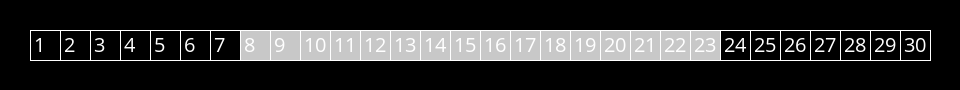

In [2]:
SIZE=30
OFFSET=30

def digit2bit(digits):
    r = []
    for d in digits:
        r.extend([1 for _ in range(d)])
        r.append(0)
    
    return r[:-1]

def check_inevitable(total, digits):
    # A function for testing purposes. 
    # Finally we used a simple but inefficient algorithm, so we don't use this function further.
    shortest = sum(digits) + len(digits) - 1
    buf = total - shortest
    r = []
    for d in digits:
        if d > buf:
            for _ in range(buf):
                r.append(0)
            for _ in range(d-buf):
                r.append(1)
        else:
            for _ in range(d):
                r.append(0)
        
        r.append(0)
    r = r[:-1]
    for _ in range(total-len(r)):
        r.append(0)
    return r



    
d = check_inevitable(30, [23])
draw_board(d)

In [3]:
def get_possibles(total_len, digits):

    if len(digits)-1+sum(digits) > total_len:
        return None
    
    d = digits[0]
    if len(digits)==1:
        r = []
        for buf in range(total_len - d + 1):
            a = []
            for _ in range(buf):
                a += [0]
            for _ in range(d):
                a += [1]
            for _ in range(total_len - buf - d):
                a += [0]
            r += [a]
        return r
    else:
        rs = []
        for buf in range(total_len - sum(digits)):
            r = []
            for _ in range(buf):
                r += [0]
            for _ in range(d):
                r += [1]
            r += [0]
            possibles = get_possibles(total_len - len(r), digits[1:])
            if possibles is None:
                pass
            else:
                for p in possibles:
                    r1 = r[:]
                    r1.extend(p)
                    rs += [r1]
        return rs
    
#draw_board(get_possibles(10, [1,2,3]))

In [4]:
%%time
horis = [[2, 1, 4, 4, 2],
 [11, 2, 5],
 [12, 2, 8],
 [10, 2, 6, 2],
 [11, 1, 5],
 [2, 6, 1, 4, 4],
 [2, 2, 2, 1, 11],
 [2, 1, 1, 1, 1, 1, 11],
 [2, 1, 7, 2, 4, 1, 2],
 [5, 1, 2, 1, 2, 4, 2],
 [1, 1, 4, 1, 2, 7],
 [3, 2, 2, 10],
 [2, 2, 9],
 [3, 4, 2, 4, 1],
 [5, 1, 5, 7],
 [4, 1, 1, 5],
 [3, 2, 1, 3, 5, 2, 2],
 [1, 2, 1, 1, 3, 2, 1],
 [2, 1, 3, 6, 4],
 [1, 2, 1, 3, 6],
 [2, 2, 3, 4, 5, 2],
 [2, 2, 3, 2, 3, 1],
 [2, 2, 3, 3, 2, 1],
 [4, 2, 6, 2, 2, 1],
 [1, 2, 2, 2, 2, 1],
 [5, 2, 2, 1, 2],
 [1, 3, 11, 2, 2],
 [2, 1, 5, 3, 1, 1],
 [3, 3, 2],
 [2, 3]]
vertis = [[2],
 [4],
 [2, 1, 1, 2, 2],
 [2, 1, 1, 4, 2, 3],
 [3, 12, 2, 1, 1],
 [4, 5, 3, 3],
 [5, 2, 1, 2, 4],
 [5, 3, 1, 2, 2],
 [4, 1, 2, 1, 2, 2],
 [5, 4, 1, 3, 2, 2],
 [5, 3, 1, 2, 3, 5],
 [7, 1, 2, 3, 4],
 [12, 1, 2],
 [6, 2, 1, 3, 1, 2, 1],
 [3, 3, 2, 1, 1, 1, 1],
 [2, 3, 2, 1, 1, 2, 1, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [6, 1, 1, 1, 2, 1, 1],
 [2, 2, 1, 2, 1, 1, 2],
 [2, 3, 2, 1, 1, 3, 1, 4],
 [2, 5, 2, 2, 3, 3, 3],
 [1, 7, 2, 1, 4, 3, 3],
 [1, 13, 3, 2, 2],
 [1, 3, 9, 2, 2],
 [4, 2, 7, 3, 1],
 [4, 4, 12, 3],
 [4, 3, 4, 11],
 [2, 3, 4, 2, 2, 3, 2, 1],
 [3, 4, 3, 2, 2, 2, 2],
 [2, 3, 3, 2, 6, 3]]
horipos = []
vertipos = []
for h in horis:
    horipos += [get_possibles(30, h)]
for v in vertis:
    vertipos += [get_possibles(30, v)]

CPU times: user 5.89 s, sys: 167 ms, total: 6.06 s
Wall time: 6.11 s


In [5]:
def solve_line(candidates, cur_status):
    # filtering by cur_status
    candidates = np.array(candidates)
    for i, d in enumerate(cur_status):
        if d==-1:
            continue
            
        candidates = candidates[candidates[:,i]==d]
    # set next_status
    sumline = candidates.sum(axis=0)
    next_status = np.array([-1]*len(cur_status))
    next_status[sumline==len(candidates)] = 1
    next_status[sumline==0] = 0
    return next_status


In [6]:
all_status = np.ones((30,30), dtype=int) * -1
all_candidates = horipos
all_candidates.extend(vertipos)
len(all_candidates)

60

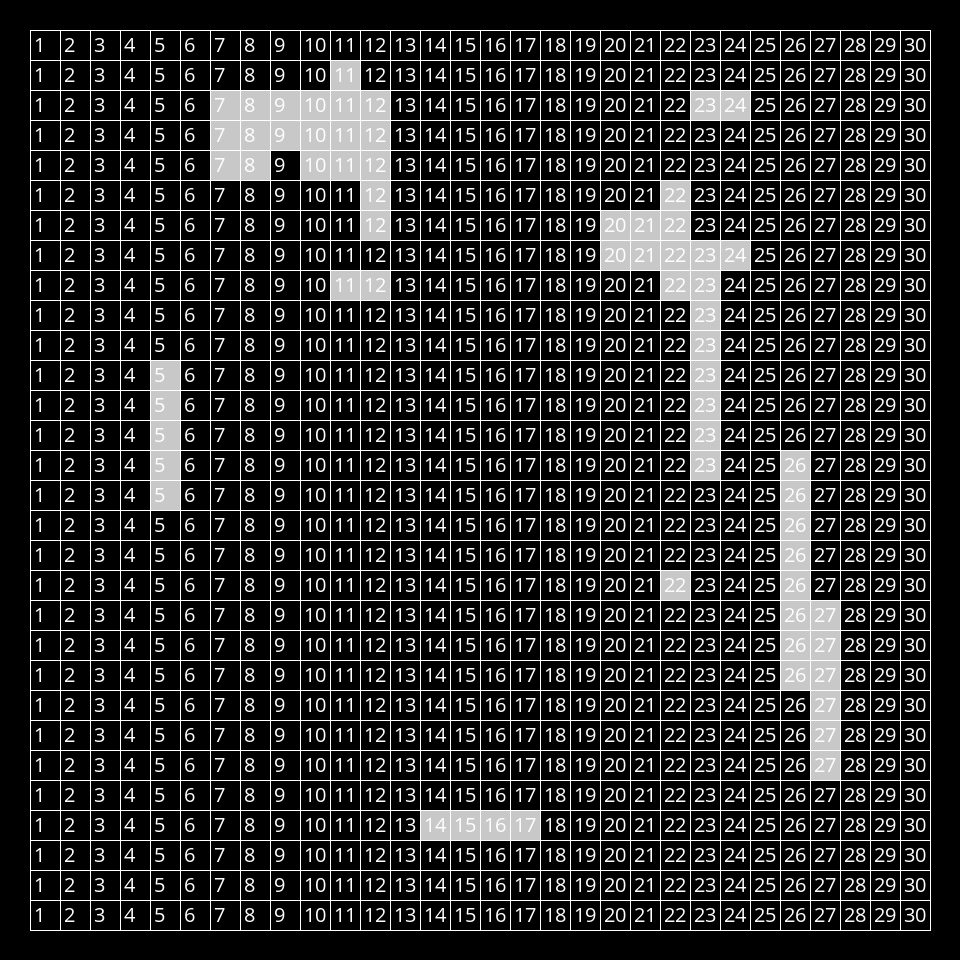

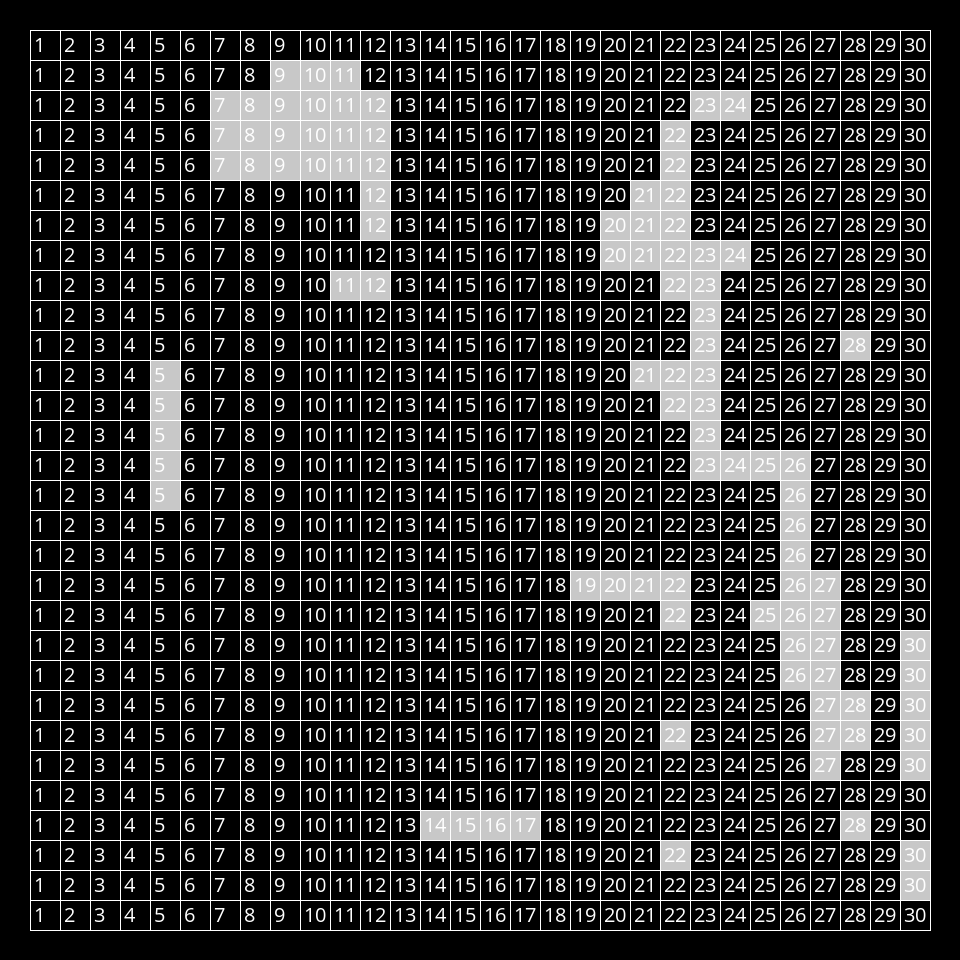

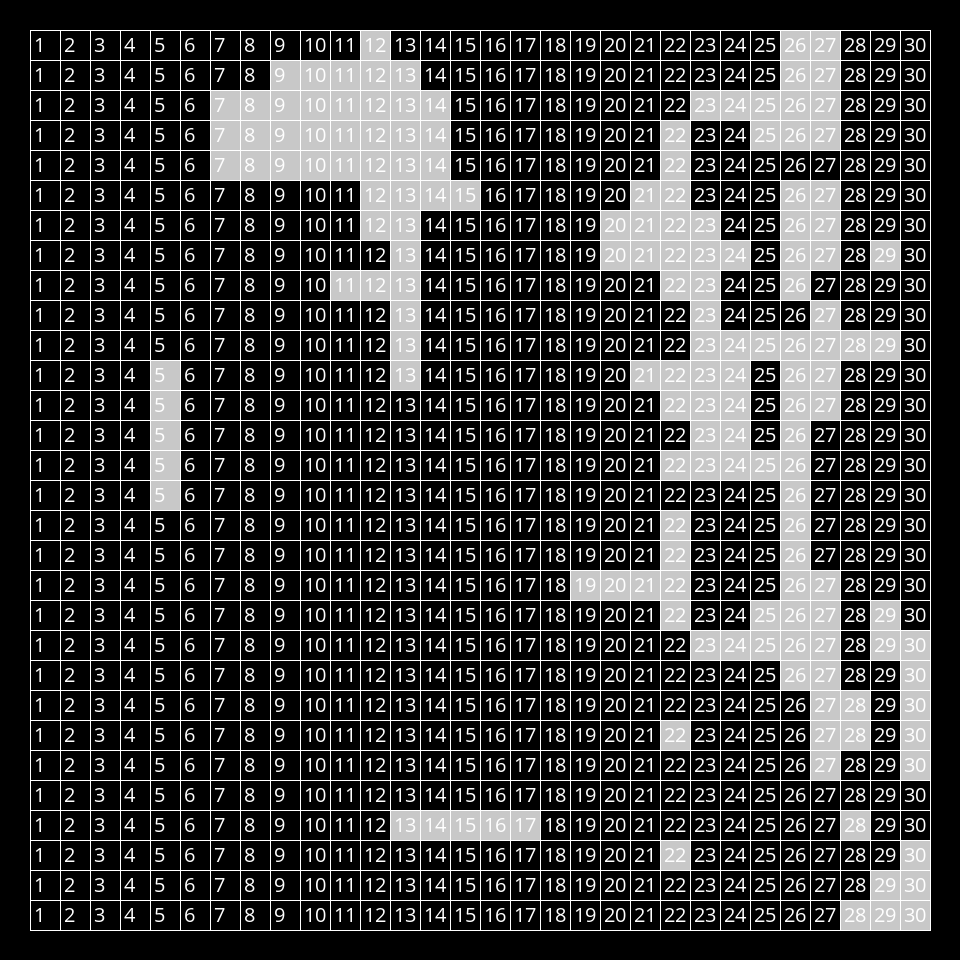

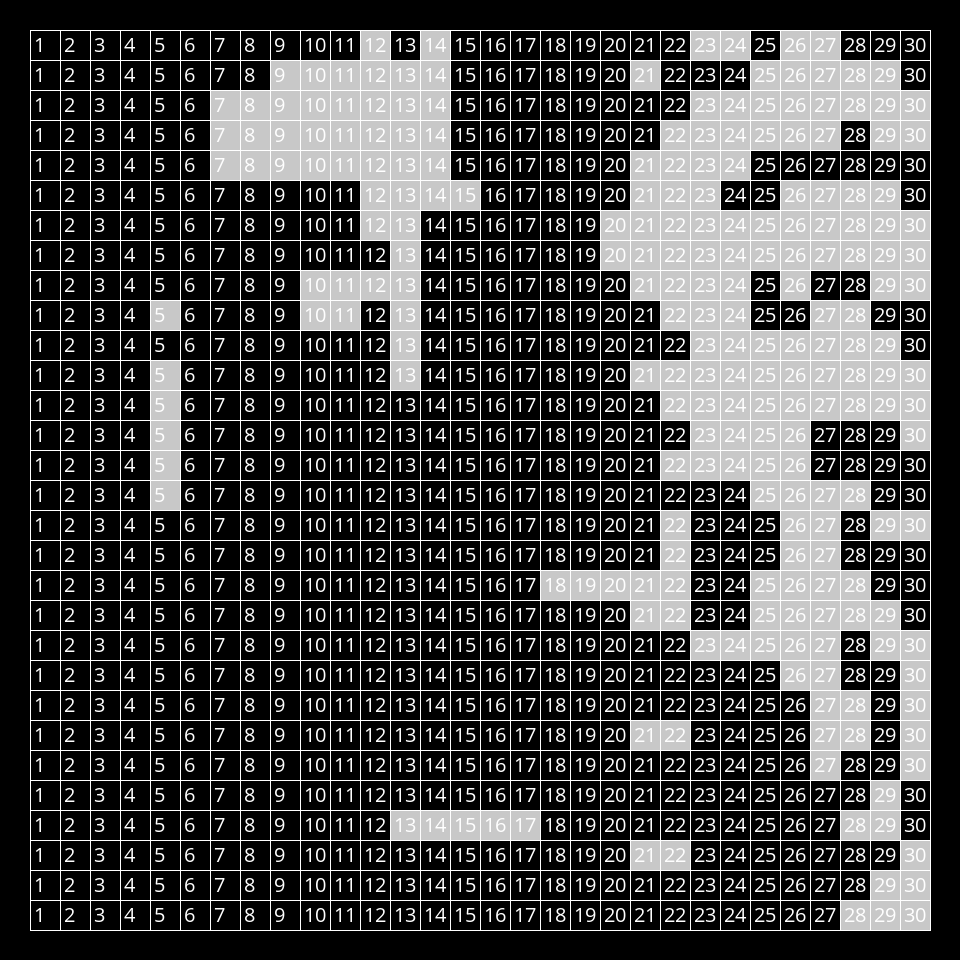

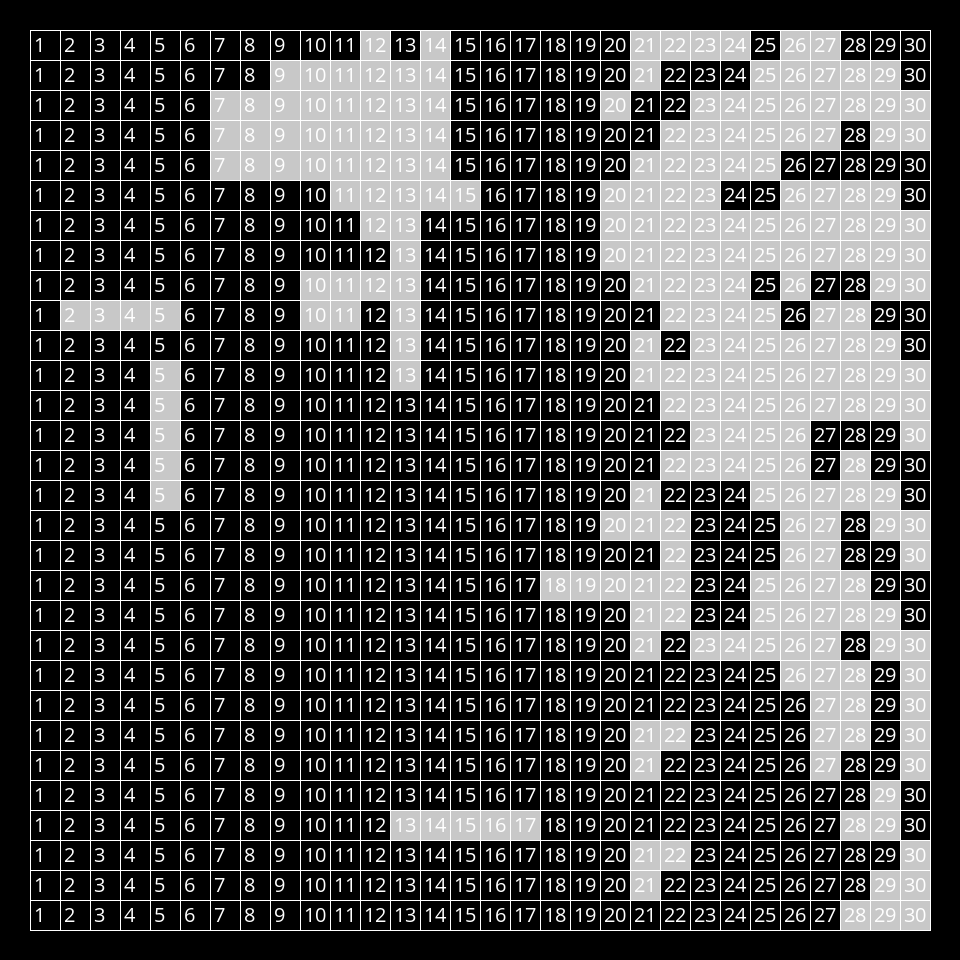

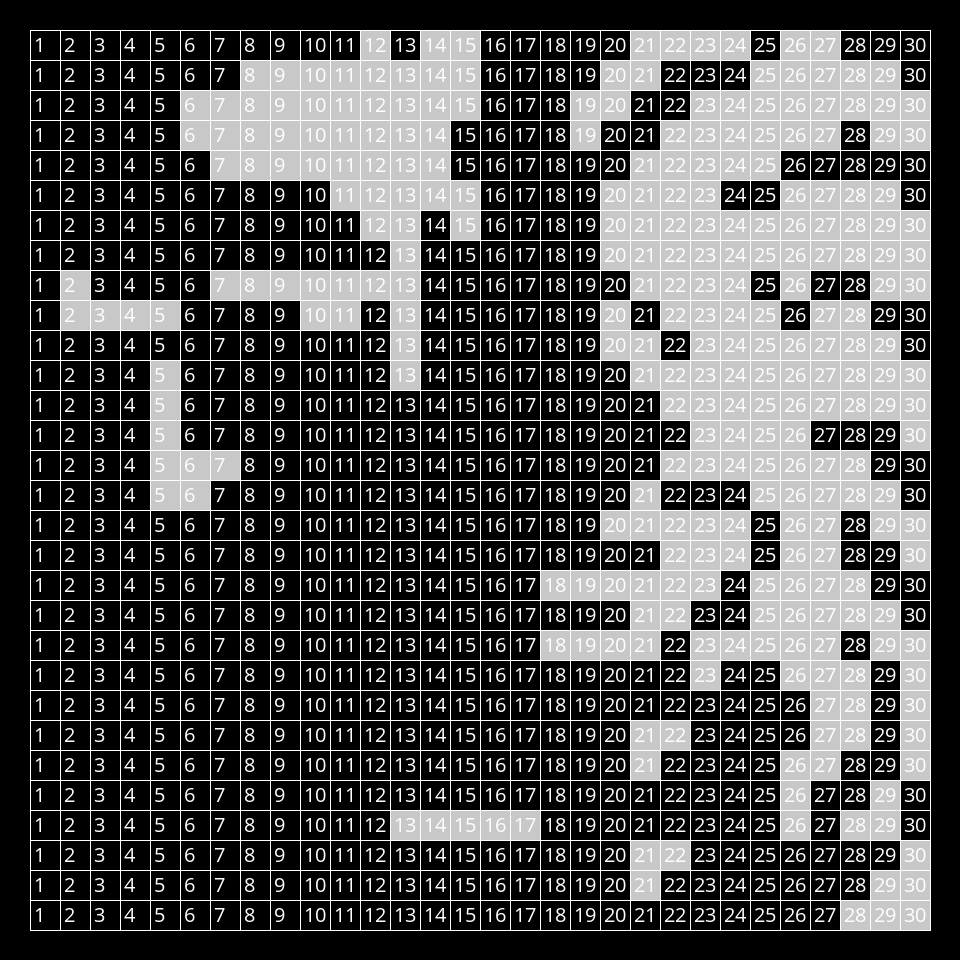

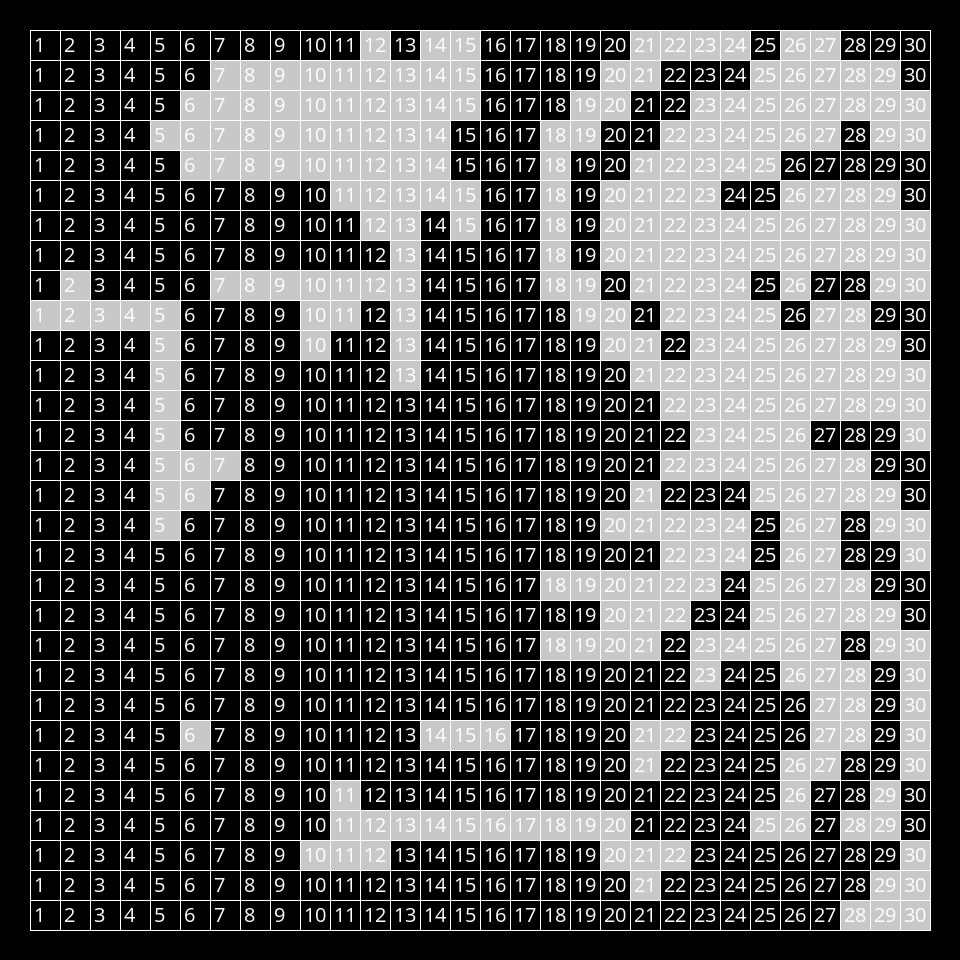

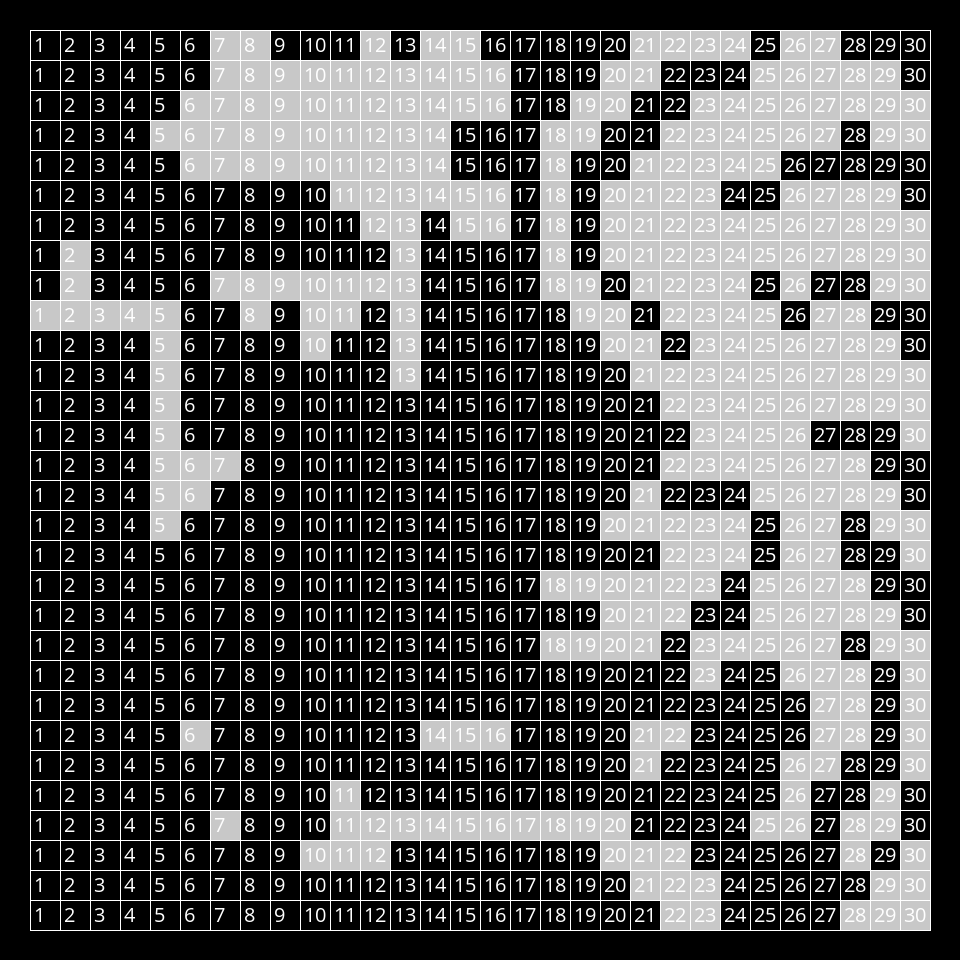

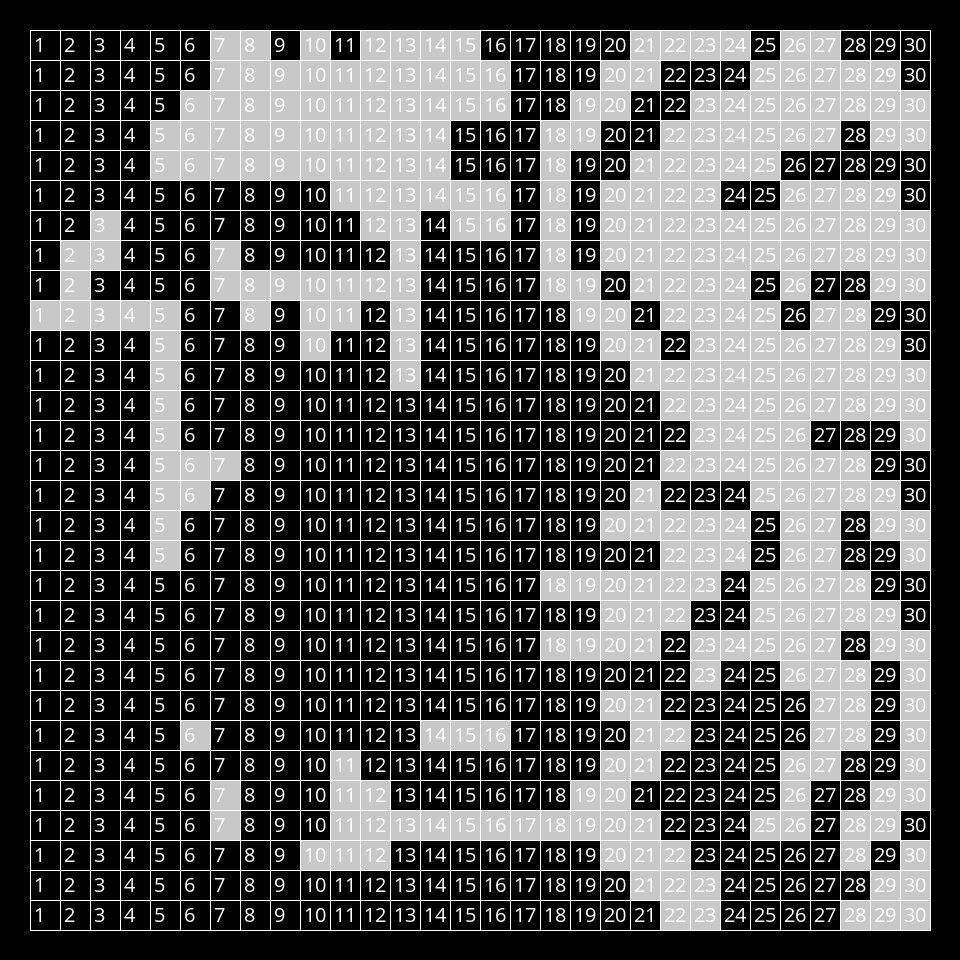

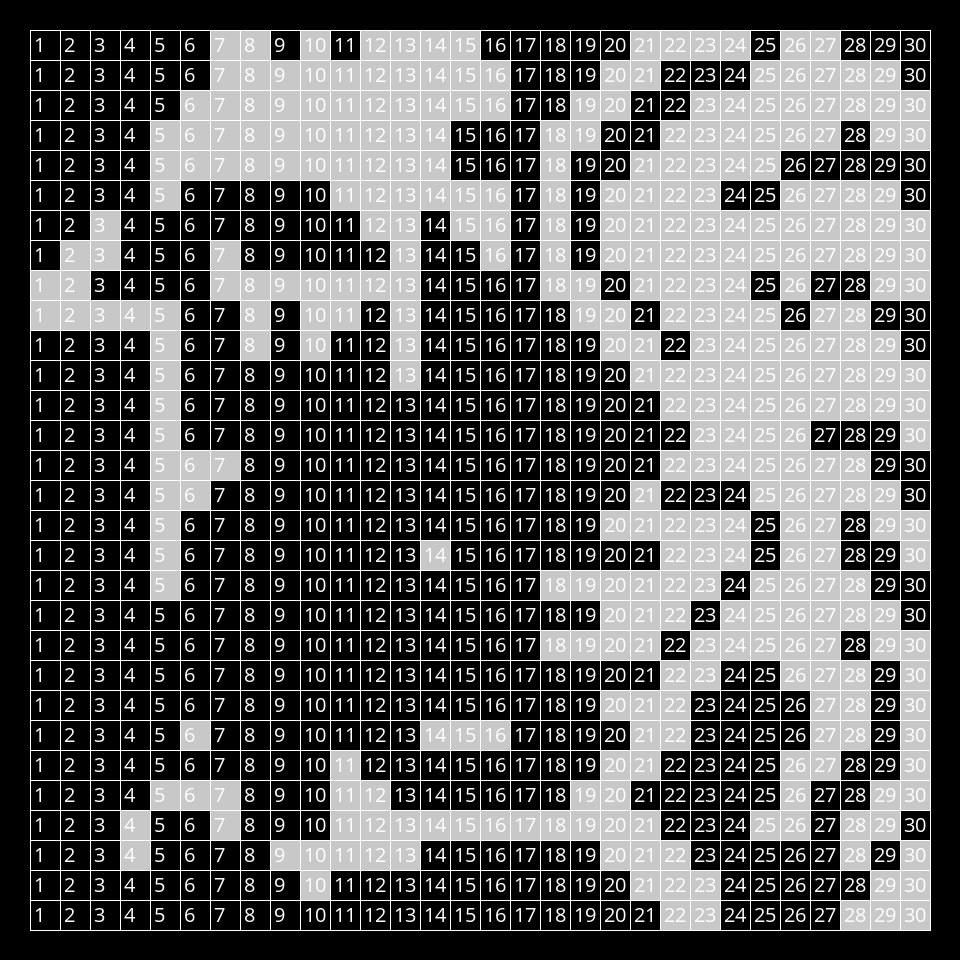

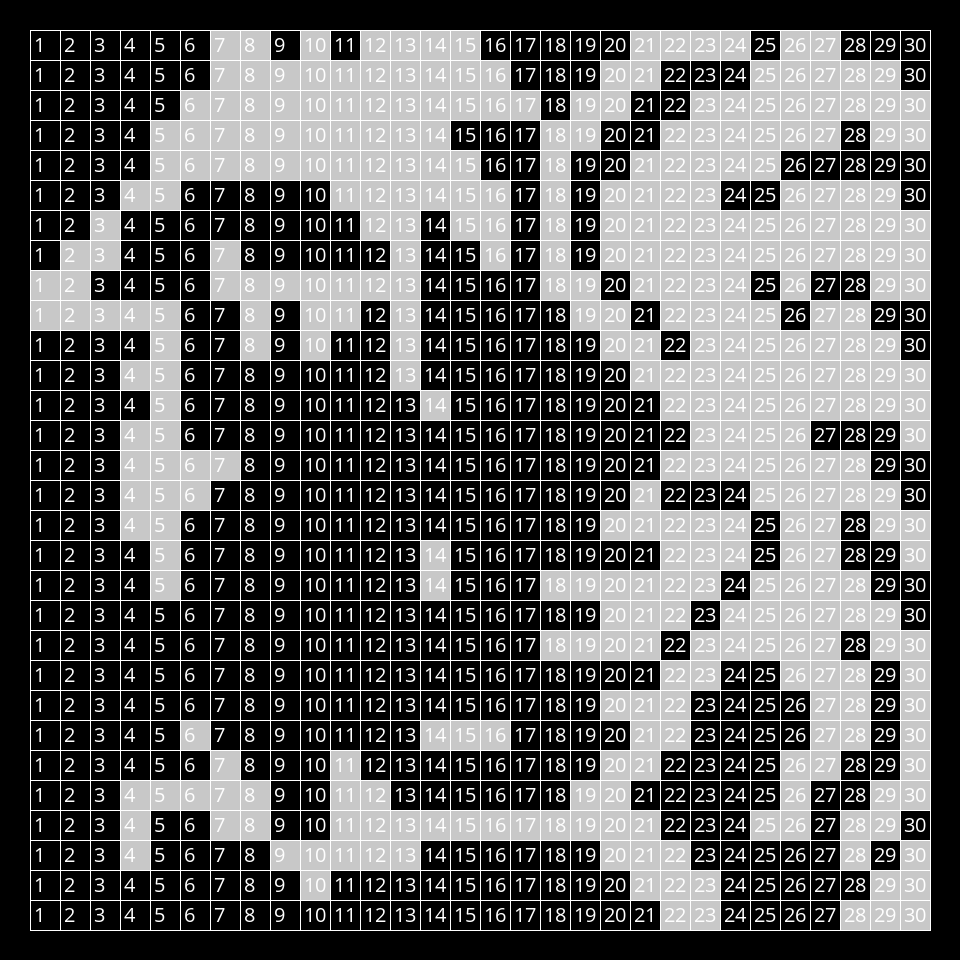

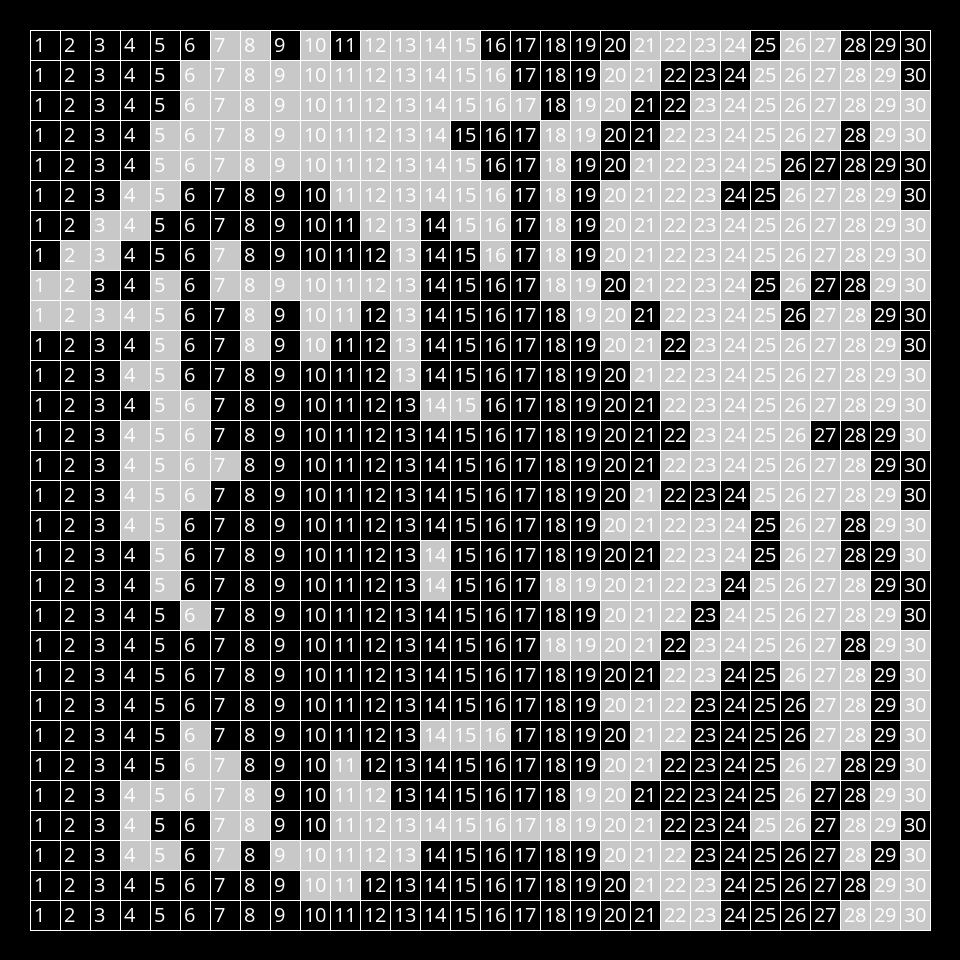

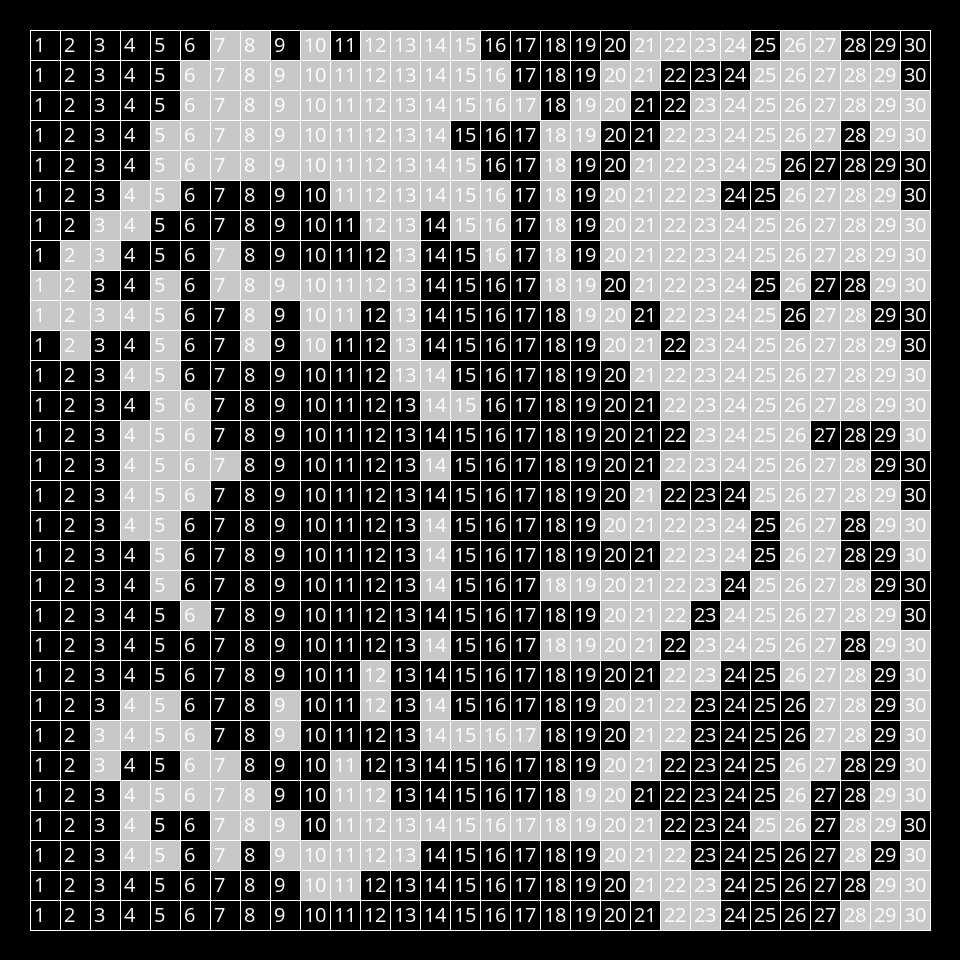

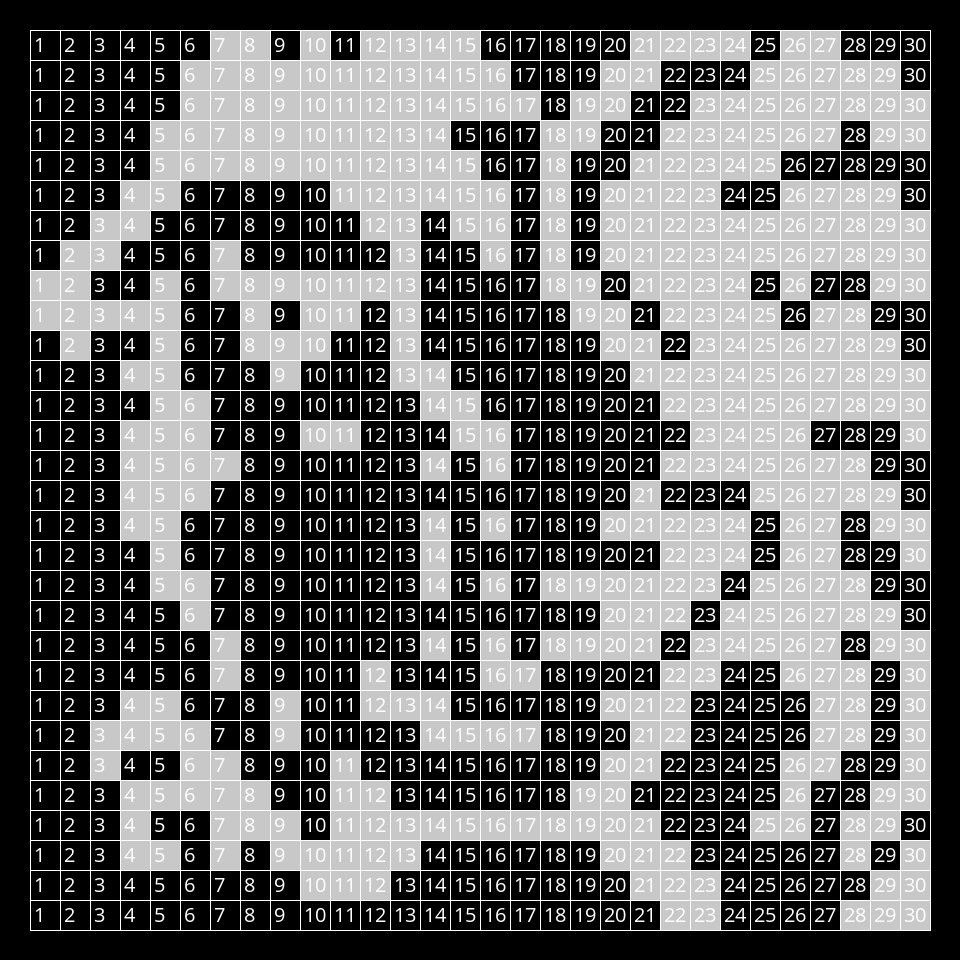

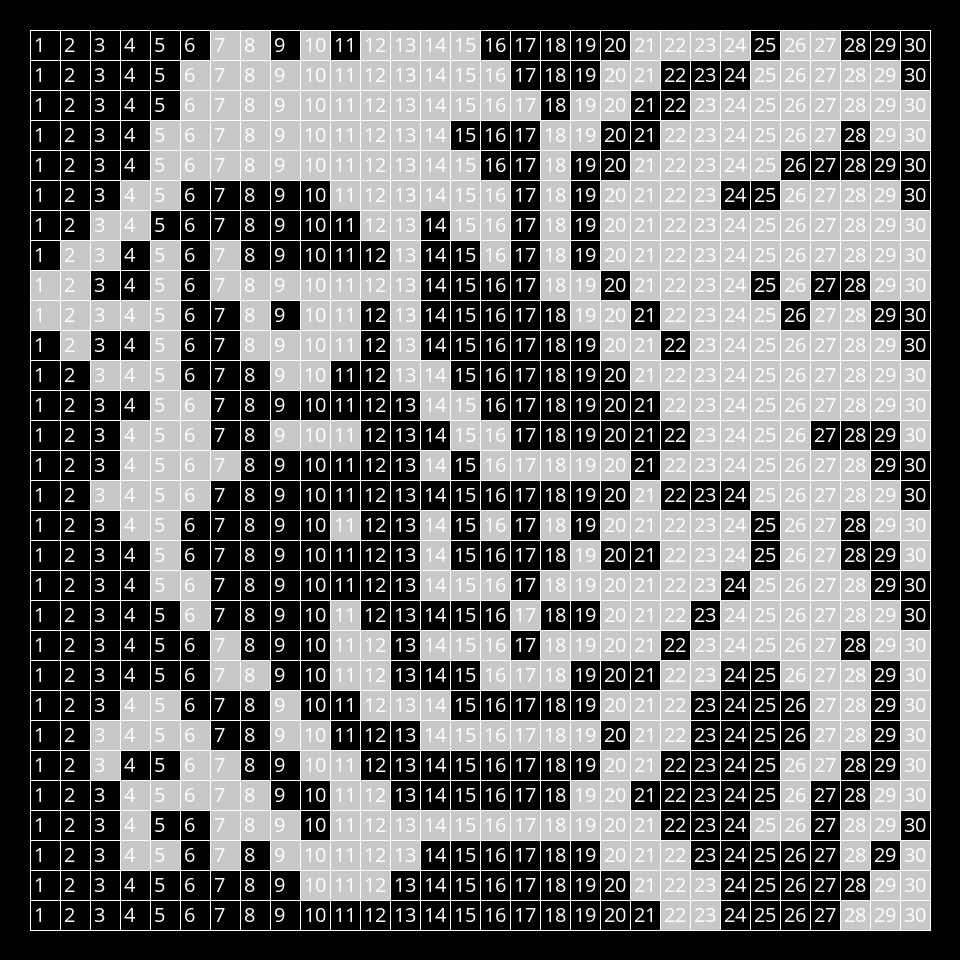

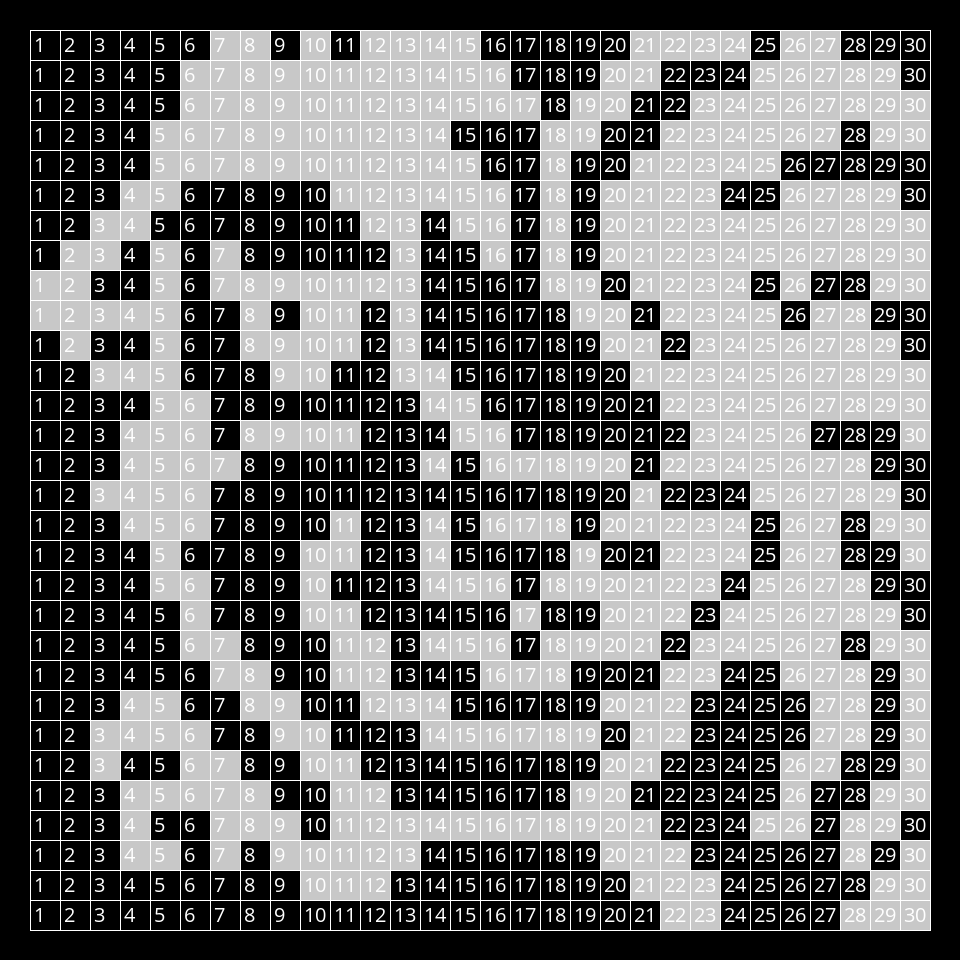

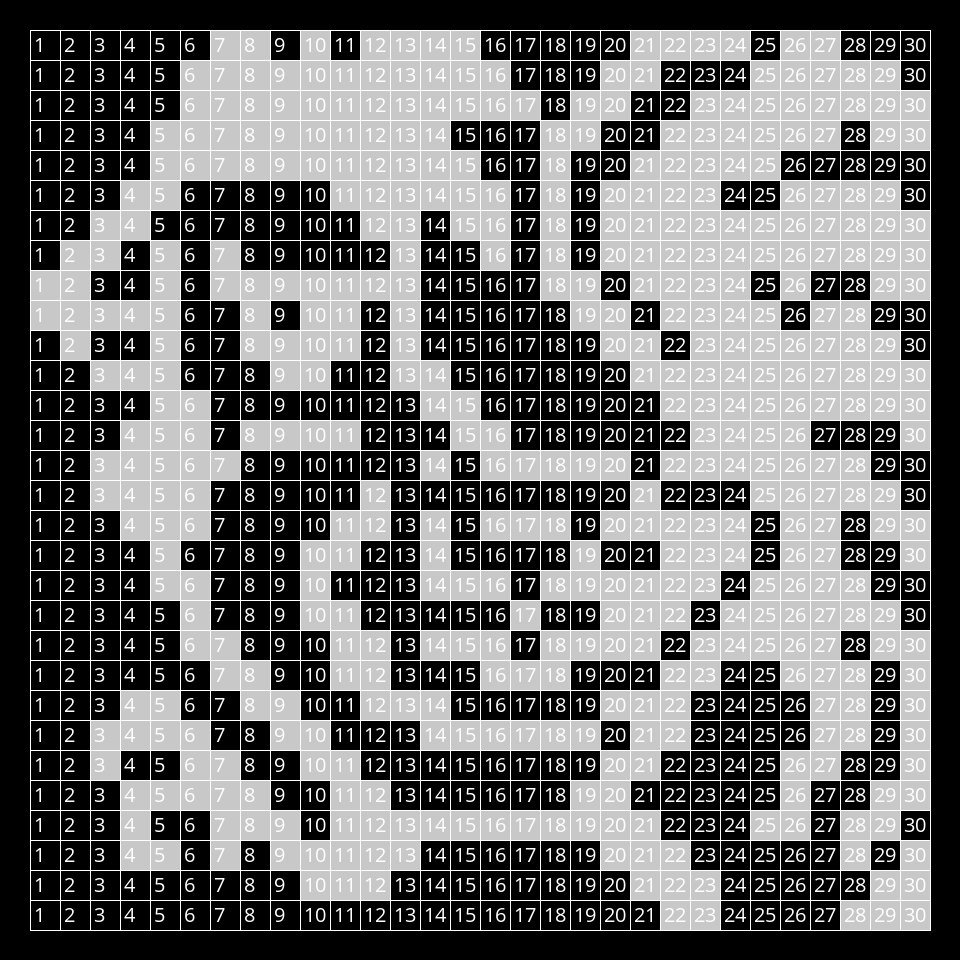

total 16 iterations


In [7]:
for it in range(30):
    for i, line in enumerate(all_status):
        next_status = solve_line(all_candidates[i], line)
        all_status[i] = next_status
    for i, line in enumerate(all_status.T):
        next_status = solve_line(all_candidates[len(all_status)+i], line)
        all_status[:,i] = next_status

    draw_status = np.copy(all_status)
    draw_status[draw_status==-1] = 0
    display(draw_board(draw_status))
    if np.sum(all_status==-1)==0:
        print('total', it, 'iterations')
        break
